In [10]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import scipy
import scipy.stats
import matplotlib.pyplot as plt

df = pd.read_excel ('Oman_MeteoriteData.xlsx')

The majority of meteorites that arrive in Earth’s upper atmosphere are most often decimetre-sized to decametric asteroid fragments; the meteorites themselves are only the infinitesimal fraction that survived ablation during the atmospheric crossing. These meteoroids are usually themselves the result of a partial fragmentation of an asteroid during an impact with another asteroid.

We are in a situation where the distribution depends on many independent causes, meteorite break, wind speed, position in the solar system; none of the causes being preponderant and the causes being added together we may feel that our distribution may be Gaussian. However, there is some doubt as these phenomena are random

So we’re going to do tests to see if our distribution is Gaussian.

In the first case, we will apply the graphic method to assess whether the distribution is Gaussian or not.

Text(0.5, 1.0, 'Distribution des lattitudes en abcisses ')

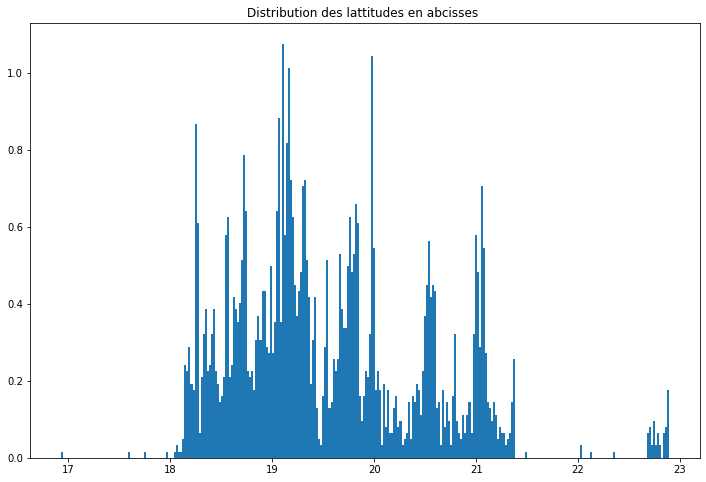

In [11]:
# Nombre de valeurs à générer
bins=300

### Génération des données
data1 = df['coord_x']

### Histogramme des données
y1, x1 = np.histogram(data1, bins=bins, density=True)
# Milieu de chaque classe
x1 = (x1 + np.roll(x1, -1))[:-1] / 2.0

plt.figure(figsize=(12,8))
plt.hist(data1, bins=300, density=True)
plt.title("Distribution des lattitudes en abcisses ")


Text(0.5, 1.0, 'Distribution des longitudes en abcisses ')

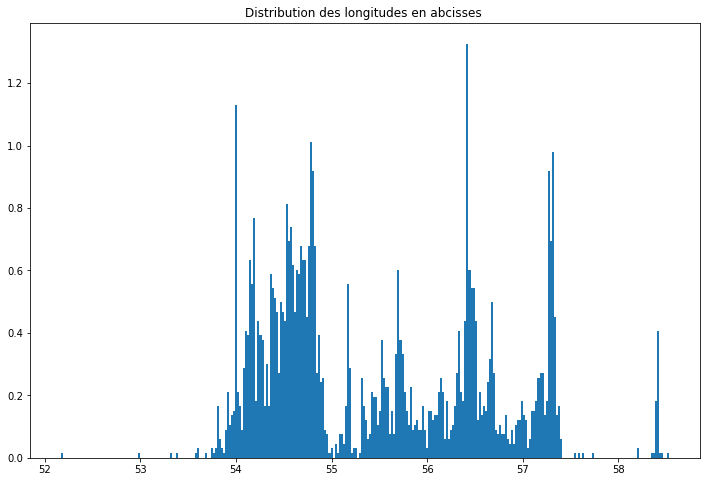

In [12]:
# Nombre de valeurs à générer
bins=300

### Génération des données
data2 = df['coord_y']

### Histogramme des données
y2, x2 = np.histogram(data2, bins=bins, density=True)
# Milieu de chaque classe
x2 = (x2 + np.roll(x2, -1))[:-1] / 2.0
plt.figure(figsize=(12,8))
plt.hist(data2, bins=300, density=True)
plt.title("Distribution des longitudes en abcisses ")


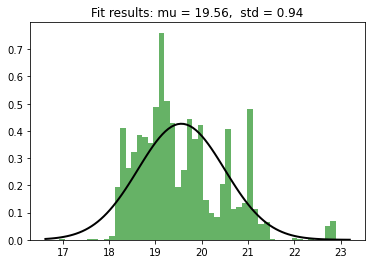

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = df['coord_x']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

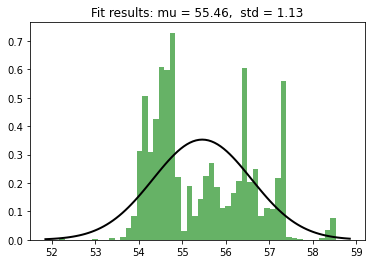

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = df['coord_y']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

We can see that the distribution of coordinates x is not really following normal law. the data are centered but not seem to adjust to the curve of the normal law.Given the normality of the data stream, we will use non parametric statistical methods.

We can develop a QQ graph in Python using the statsmodels qqplot (). The function takes the sample of data and assumes by default that we compare it to a Gaussian distribution. We can draw the standardized line by defining the line argument on s.

A complete example of the test dataset plot in the form of a QQ graph is provided below.

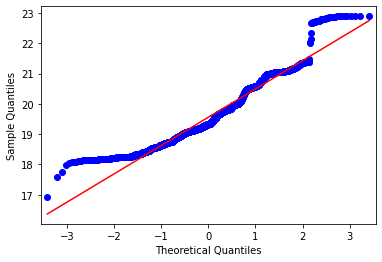

In [15]:
# QQ Plot
data = df['coord_x']
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# q-q plot
qqplot(data, line='s')
pyplot.show()

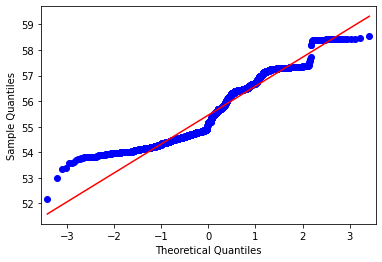

In [16]:
# QQ Plot
data = df['coord_y']
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# q-q plot
qqplot(data, line='s')
pyplot.show()

There are a  discrepancies, especially at the bottom of the graph and we see that the distribution not really fit the line; We can conclude that the distribution is not gaussian.

Statistic method

The Shapiro-Wilk test evaluates a sample of data and quantifies the probability that the data were derived from a Gaussian distribution. The shapiro () SciPy function will calculate the Shapiro-Wilk on a given data set. The function refers to both the W statistic calculated by the test and the p.

In [17]:
data = df['coord_x']
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)


In [18]:
data = df['coord_y']
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.925, p=0.000
Sample does not look Gaussian (reject H0)


We must therefore remember that this phenomenon is a phenomenon of waiting. This study is based on the realization of the event "the fall of meteorites" in a time interval.

the event = "the fall of meteorites"

The number of achievements of the event over time intervalsare independent random  variables, meaning that the number of performance over a time interval is independent of the number of achievements in previous time intervals.

The probability that "a meteorite fall on Oman", over a small time interval Δt, is proportional to the amplitude of the interval and is α Δt, where α is a positive value assumed to be constant throughout the observation period.

It is very rare to observe the event more than appear once over a small time interval Δt. The probability of the event occurring more than once over the time interval Δt is negligible.

These assumptions show that distribution can follow a fish law. a is a process constant that represents the average number of achievements per unit of time and is called the process intensity.